<a href="https://colab.research.google.com/github/champ-byte/Multimodal_GraphRAG/blob/Kavya-Zala/Embedding_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# embedding visualization

In [ ]:
!pip install -q langchain langchain-huggingface huggingface_hub

In [ ]:
import os
from langchain_huggingface import HuggingFaceEndpointEmbeddings

from google.colab import userdata
GOOGLE_API_KEY=userdata.get('HUGGINGFACEHUB_API_TOKEN')
os.environ["HUGGINGFACEHUB_API_TOKEN"] = GOOGLE_API_KEY


embedding_model = HuggingFaceEndpointEmbeddings(
    model="sentence-transformers/all-MiniLM-L6-v2"
)
texts = [
    # --- General ---
    "The weather is sunny and pleasant today.",
    "She bought a new dress from the market.",
    "Reading books helps improve vocabulary.",
    "The dog barked loudly in the park.",
    "He is painting a beautiful landscape.",

    # --- Finance ---
    "The stock market is highly volatile this week.",
    "Bitcoin prices reached an all-time high.",
    "Investors are looking for safer assets like gold.",
    "Mutual funds are a popular investment option.",
    "The bank announced a reduction in interest rates.",

    # --- Education ---
    "Students are preparing for their final exams.",
    "Online learning platforms are growing rapidly.",
    "He is pursuing a degree in data science.",
    "Teachers play a vital role in shaping careers.",
    "The university introduced a new scholarship program.",

    # --- Healthcare ---
    "Regular exercise is important for a healthy lifestyle.",
    "Doctors recommend drinking at least 8 glasses of water daily.",
    "The hospital is equipped with advanced medical facilities.",
    "Vaccinations help prevent dangerous diseases.",
    "Mental health awareness is increasing worldwide.",

    # --- Technology ---
    "Artificial intelligence is changing industries.",
    "Self-driving cars are being tested in many cities.",
    "Cloud computing provides scalable storage solutions.",
    "Cybersecurity is essential to protect online data.",
    "Smartphones have become an essential part of life.",

    # --- Travel ---
    "He is planning a trip to Paris this summer.",
    "Backpacking through Europe is a thrilling adventure.",
    "Tourists enjoy visiting the Great Wall of China.",
    "Beach resorts are popular holiday destinations.",
    "Travel agencies offer affordable tour packages.",

    # --- Food ---
    "The restaurant serves authentic Italian pasta.",
    "She loves baking cakes and cookies at home.",
    "Street food in India is famous for its flavors.",
    "A balanced diet includes fruits and vegetables.",
    "The chef prepared a five-course gourmet meal.",

    # --- Sports ---
    "Football is the most popular sport worldwide.",
    "The Olympics bring athletes together from all nations.",
    "He practices yoga every morning to stay fit.",
    "Cricket matches attract huge crowds in India.",
    "Basketball requires speed, teamwork, and agility."
]



embeddings = embedding_model.embed_documents(texts)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

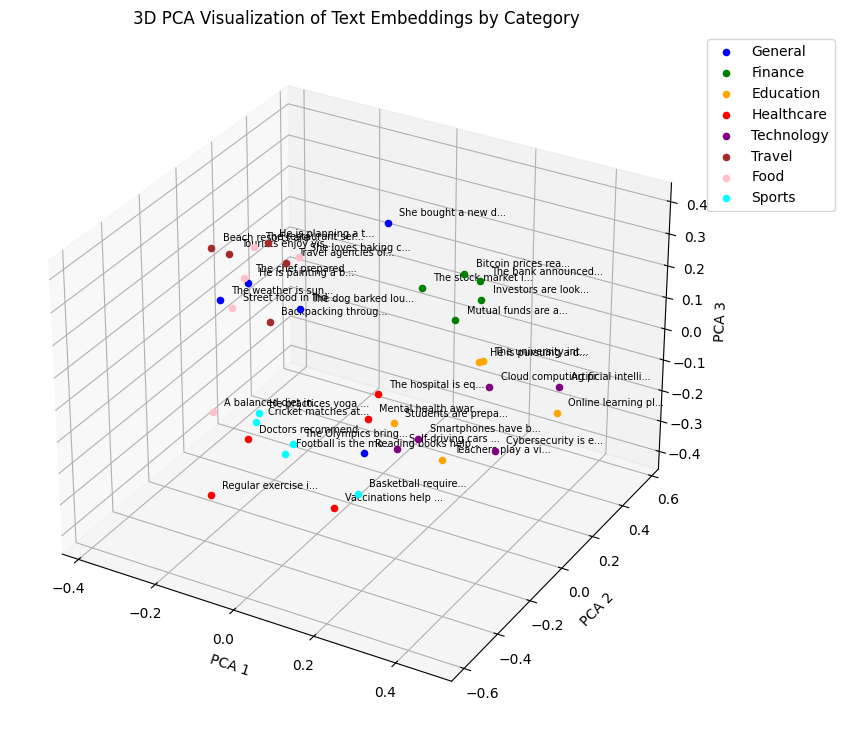

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


categories = [
    # --- General ---
    "General", "General", "General", "General", "General",

    # --- Finance ---
    "Finance", "Finance", "Finance", "Finance", "Finance",

    # --- Education ---
    "Education", "Education", "Education", "Education", "Education",

    # --- Healthcare ---
    "Healthcare", "Healthcare", "Healthcare", "Healthcare", "Healthcare",

    # --- Technology ---
    "Technology", "Technology", "Technology", "Technology", "Technology",

    # --- Travel ---
    "Travel", "Travel", "Travel", "Travel", "Travel",

    # --- Food ---
    "Food", "Food", "Food", "Food", "Food",

    # --- Sports ---
    "Sports", "Sports", "Sports", "Sports", "Sports"
]

# Assigning a color for each category
color_map = {
    "General": "blue",
    "Finance": "green",
    "Education": "orange",
    "Healthcare": "red",
    "Technology": "purple",
    "Travel": "brown",
    "Food": "pink",
    "Sports": "cyan"
}

#3D with PCA
pca = PCA(n_components=3)
reduced = pca.fit_transform(embeddings)

# 3D plot
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

#  each sentence with category color
for i, txt in enumerate(texts):
    x, y, z = reduced[i]
    category = categories[i]
    ax.scatter(x, y, z, c=color_map[category], label=category if category not in ax.get_legend_handles_labels()[1] else "")
    ax.text(x+0.02, y+0.02, z+0.02, txt[:18] + "...", fontsize=7)

# Axis labels
ax.set_title("3D PCA Visualization of Text Embeddings by Category")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")


ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()


In [ ]:
pca = PCA(n_components=2)
reduced2 = pca.fit_transform(embeddings)

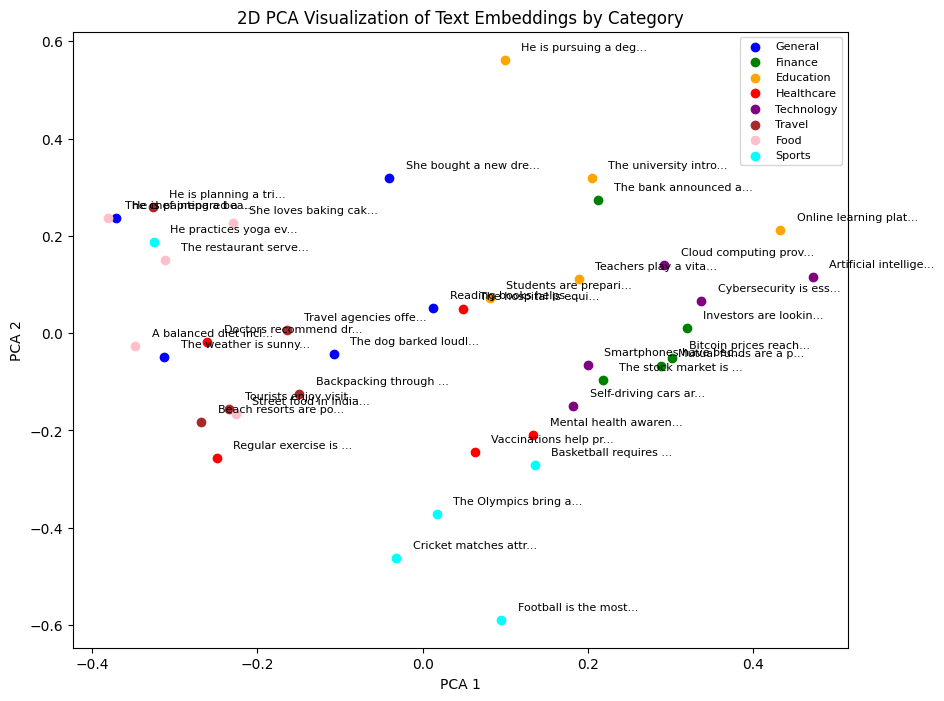

In [ ]:

plt.figure(figsize=(10,8))
for i, txt in enumerate(texts):
    x, y = reduced2[i]
    category = categories[i]
    plt.scatter(x, y, c=color_map[category], label=category if category not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(x+0.02, y+0.02, txt[:20] + "...", fontsize=8)  # shorten label

plt.title("2D PCA Visualization of Text Embeddings by Category")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(loc="best", fontsize=8)
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter(
    x=reduced2[:,0],
    y=reduced2[:,1],
    color=categories,
    text=[txt[:30] for txt in texts],
    title="2D PCA Visualization (Plotly)"
)
fig.update_traces(textposition="top center", marker=dict(size=8, opacity=0.8))
fig.show()


In [ ]:
import plotly.graph_objects as go


x_coords = [pt[0] for pt in reduced]
y_coords = [pt[1] for pt in reduced]
z_coords = [pt[2] for pt in reduced]
labels = [txt[:25] + "..." for txt in texts]

# Mapping each category to a color
point_colors = [color_map[cat] for cat in categories]

fig = go.Figure(data=[go.Scatter3d(
    x=x_coords,
    y=y_coords,
    z=z_coords,
    mode='markers+text',
    marker=dict(size=5, color=point_colors, opacity=0.8),
    text=labels,
    textposition="top center",
    hoverinfo='text'
)])


fig.update_layout(
    title="3D PCA Visualization of Text Embeddings by Category",
    scene=dict(
        xaxis_title='PCA 1',
        yaxis_title='PCA 2',
        zaxis_title='PCA 3'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    showlegend=False
)

fig.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



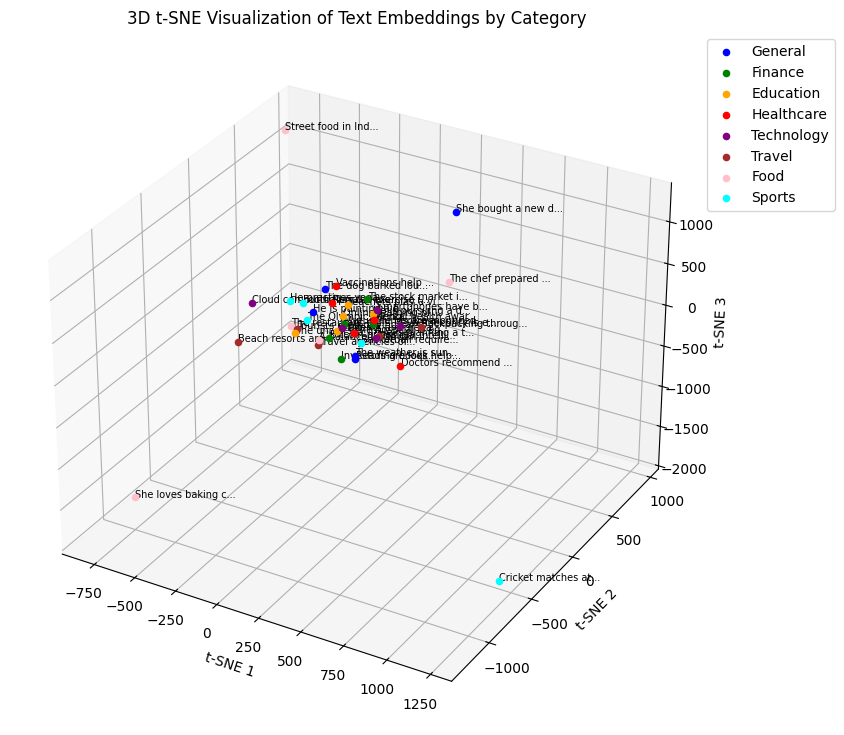

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

embeddings_array = np.array(embeddings)


tsne = TSNE(n_components=3, perplexity=10, random_state=42, learning_rate=200, n_iter=1000)
reduced_tsne = tsne.fit_transform(embeddings_array)


# Create 3D plot
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

for i, txt in enumerate(texts):
    x, y, z = reduced_tsne[i]
    category = categories[i]
    ax.scatter(x, y, z, c=color_map[category], label=category if category not in ax.get_legend_handles_labels()[1] else "")
    ax.text(x+1, y+1, z+1, txt[:18] + "...", fontsize=7)  # shorten labels

ax.set_title("3D t-SNE Visualization of Text Embeddings by Category")
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_zlabel("t-SNE 3")

# Legend
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()


In [ ]:
tsne = TSNE(n_components=2, perplexity=10, random_state=42, learning_rate=200, n_iter=1000)
reduced_tsne = tsne.fit_transform(embeddings_array)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



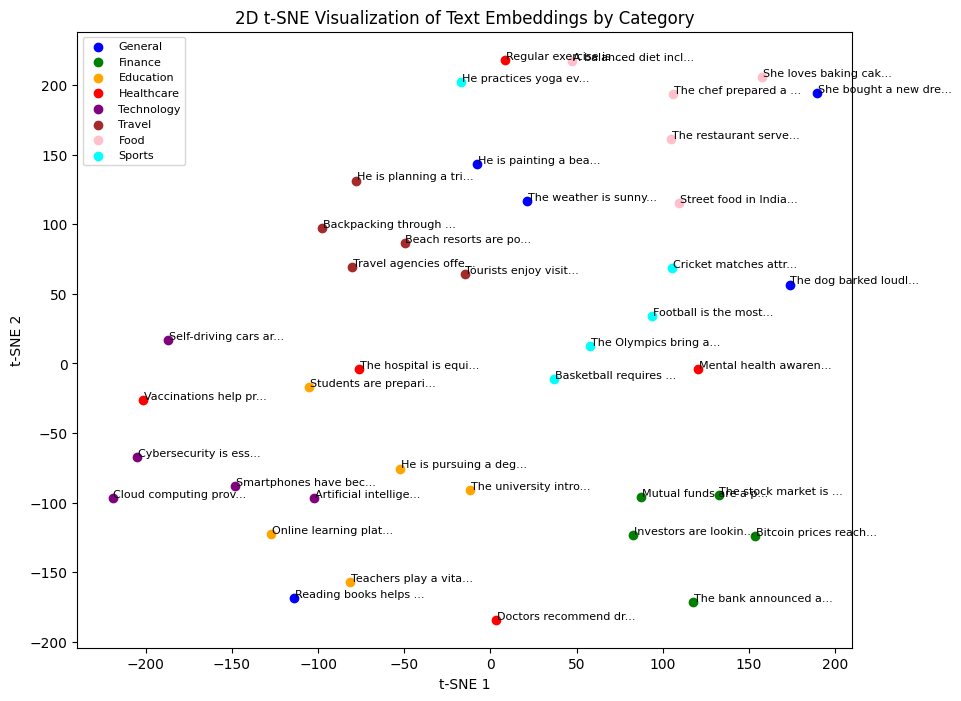

In [ ]:

plt.figure(figsize=(10,8))
for i, txt in enumerate(texts):
    x, y = reduced_tsne[i]
    category = categories[i]
    plt.scatter(x, y, c=color_map[category], label=category if category not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(x+0.5, y+0.5, txt[:20] + "...", fontsize=8)

plt.title("2D t-SNE Visualization of Text Embeddings by Category")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(loc="best", fontsize=8)
plt.show()

In [ ]:
#t-SNE for 3D
tsne3d = TSNE(n_components=3, perplexity=5, random_state=42, learning_rate=200, n_iter=1000)
reduced_tsne_3d = tsne3d.fit_transform(embeddings_array)

fig = px.scatter_3d(
    x=reduced_tsne_3d[:,0],
    y=reduced_tsne_3d[:,1],
    z=reduced_tsne_3d[:,2],
    color=categories,
    text=[txt[:30] for txt in texts],
    title="3D t-SNE Visualization (Plotly)"
)
fig.update_traces(marker=dict(size=5, opacity=0.8))
fig.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



# Clip Model
